In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from shutil import copy2

# Paths
input_dir = '/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14'
output_dir = '/kaggle/working/preprocessed_data'
os.makedirs(output_dir, exist_ok=True)

folders = ['train', 'valid']

# Resize images to 640x640 and copy labels
def preprocess_data():
    for folder in folders:
        img_dir = os.path.join(input_dir, folder, 'images')
        label_dir = os.path.join(input_dir, folder, 'labels')
        out_img_dir = os.path.join(output_dir, folder, 'images')
        out_label_dir = os.path.join(output_dir, folder, 'labels')

        os.makedirs(out_img_dir, exist_ok=True)
        os.makedirs(out_label_dir, exist_ok=True)

        for file in tqdm(os.listdir(img_dir)):
            img_path = os.path.join(img_dir, file)
            label_path = os.path.join(label_dir, file.replace('.jpg', '.txt'))
            out_img_path = os.path.join(out_img_dir, file)
            out_label_path = os.path.join(out_label_dir, file.replace('.jpg', '.txt'))

            try:
                # Resize image
                with cv2.imread(img_path) as img:
                    img = cv2.resize(img, (640, 640))
                    cv2.imwrite(out_img_path, img)

                # Copy labels
                if os.path.exists(label_path):
                    copy2(label_path, out_label_path)
                else:
                    print(f"Warning: No label found for {file}")

            except Exception as e:
                print(f"Error processing {file}: {e}")

preprocess_data()
print("✅ Preprocessing completed!")


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from shutil import copy2

# Paths
input_dir = '/kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14'
output_dir = '/kaggle/working/preprocessed_data'
os.makedirs(output_dir, exist_ok=True)

folders = ['train', 'valid']
bad_images = []  # Store filenames of images that fail

# Resize images to 640x640 and copy labels
def preprocess_data():
    for folder in folders:
        img_dir = os.path.join(input_dir, folder, 'images')
        label_dir = os.path.join(input_dir, folder, 'labels')
        out_img_dir = os.path.join(output_dir, folder, 'images')
        out_label_dir = os.path.join(output_dir, folder, 'labels')

        os.makedirs(out_img_dir, exist_ok=True)
        os.makedirs(out_label_dir, exist_ok=True)

        for file in tqdm(os.listdir(img_dir)):
            img_path = os.path.join(img_dir, file)
            label_path = os.path.join(label_dir, file.replace('.jpg', '.txt'))
            out_img_path = os.path.join(out_img_dir, file)
            out_label_path = os.path.join(out_label_dir, file.replace('.jpg', '.txt'))

            try:
                # Try loading the image
                img = cv2.imread(img_path)
                if img is None:
                    raise ValueError(f"Unreadable image: {file}")

                # Resize image
                img = cv2.resize(img, (640, 640))
                cv2.imwrite(out_img_path, img)

                # Copy labels
                if os.path.exists(label_path):
                    copy2(label_path, out_label_path)
                else:
                    print(f"Warning: No label found for {file}")

            except Exception as e:
                print(f"⚠️ Skipping {file} due to error: {e}")
                bad_images.append(file)

preprocess_data()

# Save the list of bad images
with open('/kaggle/working/bad_images.txt', 'w') as f:
    for item in bad_images:
        f.write("%s\n" % item)

print("✅ Preprocessing completed!")
print(f"⚠️ {len(bad_images)} images failed. List saved to bad_images.txt")


In [ ]:
!ls /kaggle/working/preprocessed_data/train/images | head -10


In [ ]:
data_yaml = """
train: /kaggle/working/preprocessed_data/train/images
val: /kaggle/working/preprocessed_data/valid/images
nc: 8
names:
  - Bad_Apple
  - Bad_Guava
  - Bad_Mango
  - Bad_Orange
  - Good_Apple
  - Good_Guava
  - Good_Mango
  - Good_Orange
"""

# Save the file
with open('/kaggle/working/data.yaml', 'w') as file:
    file.write(data_yaml)

print("✅ `data.yaml` has been created successfully!")


In [1]:
!pip install ultralytics



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 15.6 MB/s eta 0:00:00a 0:00:01


In [ ]:
!cat /kaggle/working/data.yaml


In [ ]:
from ultralytics import YOLO

# ✅ Define the path to `data.yaml`
data_yaml_path = "/kaggle/working/data.yaml"  

# ✅ Load YOLO model
model = YOLO('yolov8s.pt')  # Change to 'yolov8n.pt' if needed

# ✅ Train the model
results = model.train(
    data='/kaggle/working/data.yaml',  # Path to `data.yaml`
    epochs=50,  
    imgsz=640,  
    batch=16,  
    lr0=0.001,  
    device=0,  
    project='/kaggle/working',  
    name='fruit_detection_clean'  
)

print("✅ Training completed successfully!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /kaggle/working/preprocessed_data/valid/images/IMG_20190910_172654_1_jpg.rf.86463bd2de46c5135697ac5d6c04df27.jpg: 640x640 1 Bad_Apple, 502.3ms
Speed: 9.7ms preprocess, 502.3ms inference, 17.5ms postprocess per image at shape (1, 3, 640, 640)


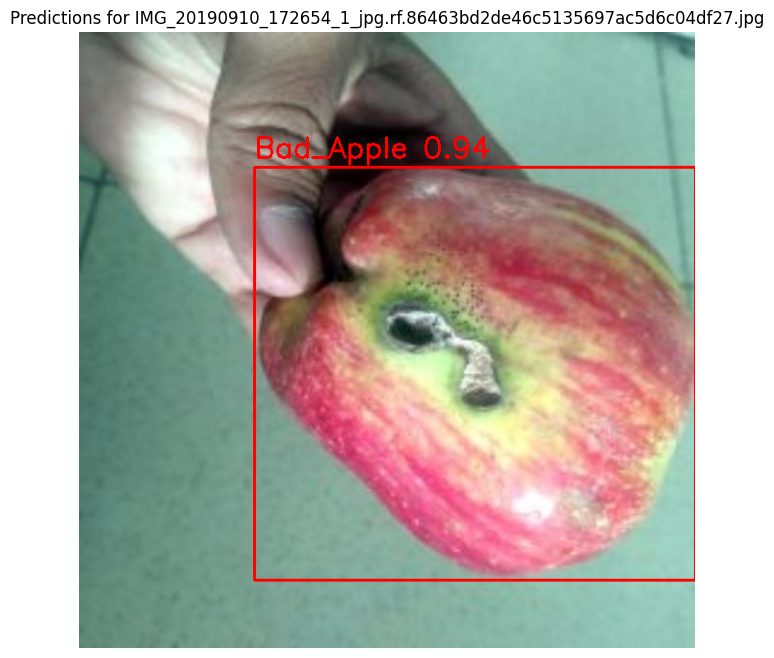


image 1/1 /kaggle/working/preprocessed_data/valid/images/BadOrange-13-_jpg.rf.489ce734fb99dcc7c597b5fd198369f3.jpg: 640x640 1 Bad_Orange, 357.7ms
Speed: 2.0ms preprocess, 357.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


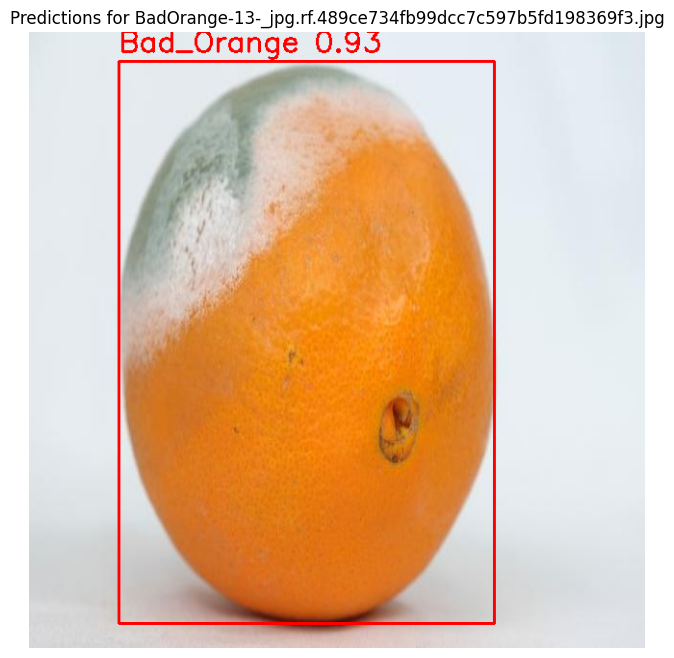

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# ✅ Load the trained model
model_path = "/kaggle/working/fruit_detection_clean2/weights/best.pt"  # Change if needed
model = YOLO(model_path)

# ✅ Define the path to validation images
val_images_dir = "/kaggle/working/preprocessed_data/valid/images"

# ✅ Select one or two images for testing (modify as needed)
test_images = ["IMG_20190910_172654_1_jpg.rf.86463bd2de46c5135697ac5d6c04df27.jpg",
               "BadOrange-13-_jpg.rf.489ce734fb99dcc7c597b5fd198369f3.jpg"]  # Change filenames as needed

for test_image_name in test_images:
    test_image_path = os.path.join(val_images_dir, test_image_name)
    
    # ✅ Run inference
    results = model.predict(test_image_path, conf=0.5)  # Adjust confidence threshold if needed

    # ✅ Load the image
    image = cv2.imread(test_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # ✅ Draw bounding boxes and labels
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        scores = result.boxes.conf.cpu().numpy()
        class_ids = result.boxes.cls.cpu().numpy()
        class_names = result.names

        for box, score, class_id in zip(boxes, scores, class_ids):
            if score >= 0.5:
                x1, y1, x2, y2 = map(int, box)
                label = f"{class_names[int(class_id)]} {score:.2f}"
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw bounding box
                cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Draw label

    # ✅ Display the image with detections
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.title(f"Predictions for {test_image_name}")
    plt.axis('off')
    plt.show()


In [ ]:
from ultralytics import YOLO

# ✅ Load the best-trained model on clean data
model = YOLO("/kaggle/working/fruit_detection_clean2/weights/best.pt")

# ✅ Resume training for 50 more epochs (Best for improving accuracy)
results = model.train(
    data="/kaggle/working/data.yaml",  # Ensure it still points to clean images
    epochs=50,  # Continue training for 50 more epochs
    imgsz=640,
    batch=16,
    lr0=0.001,  # Learning rate (you can tune this)
    device=0,  # Use GPU if available
    project="/kaggle/working",
    name="fruit_detection_clean_resume"
)

print("✅ Training resumed successfully on clean data!")


In [ ]:
from ultralytics import YOLO

model = YOLO("/kaggle/working/fruit_detection_clean_resume/weights/best.pt")  # Load latest trained model
metrics = model.val()  # Evaluate performance on validation set

print(metrics)  # Display mAP, precision, recall, etc.


In [3]:
import shutil

# Path to your current best trained model on clean data
clean_model_path = "/kaggle/working/fruit_detection_clean_resume/weights/best.pt"

# Save a copy before training on noisy data
backup_model_path = "/kaggle/working/best_clean_model.pt"

shutil.copy(clean_model_path, backup_model_path)
print(f"✅ Clean model saved as {backup_model_path}")


✅ Clean model saved as /kaggle/working/best_clean_model.pt


In [ ]:
from ultralytics import YOLO

model = YOLO("/kaggle/working/fruit_detection_clean_resume/weights/best.pt")

results = model.train(
    data="/kaggle/working/data.yaml",
    epochs=50,  # Another 50 epochs
    imgsz=640,
    batch=16,
    lr0=0.001,
    device=0,
    project="/kaggle/working",
    name="fruit_detection_clean_final"
)

print("✅ Further training on clean data started!")
